<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [76]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-11 15:59:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-08-11 15:59:16 (11.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [77]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [78]:
df.shape

(346, 10)

### Convert to date time object 

In [79]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [80]:
#To make sure we are going to have a good model with enough data points
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [81]:
#We correct the misspelling of Bachelor
df.replace({'Bechalor':'Bachelor'},inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [82]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.6.24-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

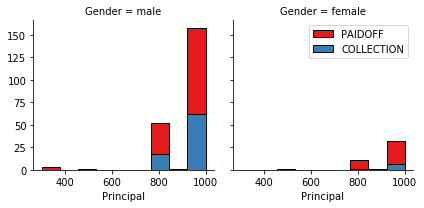

In [83]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

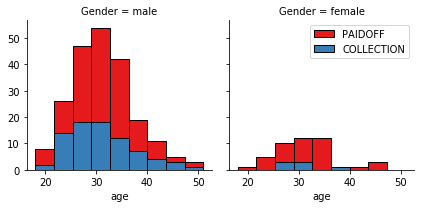

In [84]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

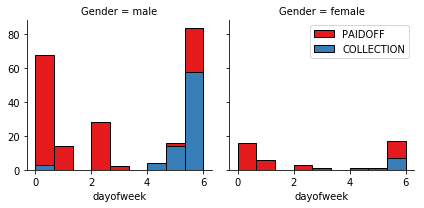

In [85]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
#We skip the adding of the weekend value to the dataset. I'll leave the cell to indicate the change.


#df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
#df.head()

## Convert Categorical features to numerical values

Lets look at gender:

In [86]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [87]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4


## One Hot Encoding  
#### How about education?

In [88]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bachelor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [89]:
#Adding dayofweek to the terms
df[['Principal','terms','age','Gender','education', 'dayofweek']].head()

,Principal,terms,age,Gender,education,dayofweek
0,1000,30,45,0,High School or Below,3
1,1000,30,33,1,Bachelor,3
2,1000,15,27,0,college,3
3,1000,30,28,1,college,4
4,1000,30,29,0,college,4


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [90]:
#The original didn't include day of week, only if it was the weekend or not. In order to get a better model, we will try to use the actual day of the week. 
Feature = df[['Principal','terms','age','Gender','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#There are only two values with Master and Above. If we used this data, it will lead to overfitting.
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,dayofweek,Bachelor,High School or Below,college
0,1000,30,45,0,3,0,1,0
1,1000,30,33,1,3,1,0,0
2,1000,15,27,0,3,0,0,1
3,1000,30,28,1,4,0,0,1
4,1000,30,29,0,4,0,0,1


### Feature selection

Lets defind feature sets, X:

In [91]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,dayofweek,Bachelor,High School or Below,college
0,1000,30,45,0,3,0,1,0
1,1000,30,33,1,3,1,0,0
2,1000,15,27,0,3,0,0,1
3,1000,30,28,1,4,0,0,1
4,1000,30,29,0,4,0,0,1


What are our lables?

In [92]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [93]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.52,  0.92,  2.33, -0.42, -0.26, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -0.26,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -0.26, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.12, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.12, -0.38, -0.88,  1.15]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [94]:
#Here we get the shape of the data. This allows us to choose our test size more accurately.

X.shape

(346, 8)

In [95]:
#Here we import our splitting function to separate training data from testing data. 
from sklearn.model_selection import train_test_split
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
#Verifying the split
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [24]:
#Now we set up a for loop to check a variety of K values.
#Import the required packages. Mainly the classifier itself and the metrics we need to analyze it.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#We start with the number of neighbors
Ks = 50
#Initialize the average and standard deviation vectors along with the confusion matrix associated with each K
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

#For loop over the values of K
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatknn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhatknn==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7       , 0.61428571, 0.7       , 0.72857143, 0.7       ,
       0.7       , 0.72857143, 0.71428571, 0.71428571, 0.71428571,
       0.74285714, 0.75714286, 0.8       , 0.74285714, 0.74285714,
       0.71428571, 0.77142857, 0.77142857, 0.75714286, 0.8       ,
       0.77142857, 0.8       , 0.75714286, 0.72857143, 0.74285714,
       0.72857143, 0.72857143, 0.71428571, 0.72857143, 0.72857143,
       0.74285714, 0.74285714, 0.74285714, 0.74285714, 0.74285714,
       0.74285714, 0.74285714, 0.74285714, 0.74285714, 0.74285714,
       0.74285714, 0.74285714, 0.74285714, 0.74285714, 0.74285714,
       0.74285714, 0.74285714, 0.74285714, 0.74285714])

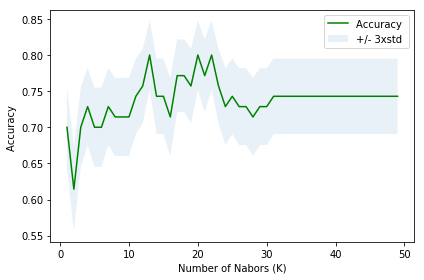

In [96]:
#Now we plot over the values of K and see which one has the best accuracy.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

As we can see here, after about 30 neighbors (around 10% of the data) we do not increase the accuracy very much. Hence we can use this to find the exact value of K that we want. Note that if we had the weekend variable instead of the dayofweek variable there is a lot more noise in the tail of the plot. This indicates and improvement.

In [97]:
#Here we produce the accuracy of the model for different values of k.
mean_acc[1:25]

array([0.61, 0.7 , 0.73, 0.7 , 0.7 , 0.73, 0.71, 0.71, 0.71, 0.74, 0.76,
       0.8 , 0.74, 0.74, 0.71, 0.77, 0.77, 0.76, 0.8 , 0.77, 0.8 , 0.76,
       0.73, 0.74])

In [98]:
#Finding the best value of K
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8 with k= 13


Note that the values k of 19 and 21 also produce an accuracy of .8. However, this would increase the computation time so the value of k=13 is the best value of k for this model. 

In [133]:
#Running again with just k=13
k = 13
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhatknn = neigh.predict(X_test)
yhatknn[0:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION'],
      dtype=object)

# Decision Tree

In [99]:
#First we set up the input and target data for both the training and test data
#These were created earlier with X and y. We check the shape just to be certain.
print('The shape of X_train is', X_train.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of X_train is (276, 8)
The shape of y_train is (276,)
The shape of X_test is (70, 8)
The shape of y_test is (70,)


In [100]:
#Import the packages
from sklearn.tree import DecisionTreeClassifier

In [101]:
#Here we start the model
loantree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
loantree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
#Fitting the data
loantree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
#setting up the prediction
predTree = loantree.predict(X_test)
predTree[0:5]

array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [33]:
#Need to install pydotplus and graphviz
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [104]:
#Now we set up the visualization for the decision tree. Without this, we won't understand the model.
#import packages, just to make sure
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

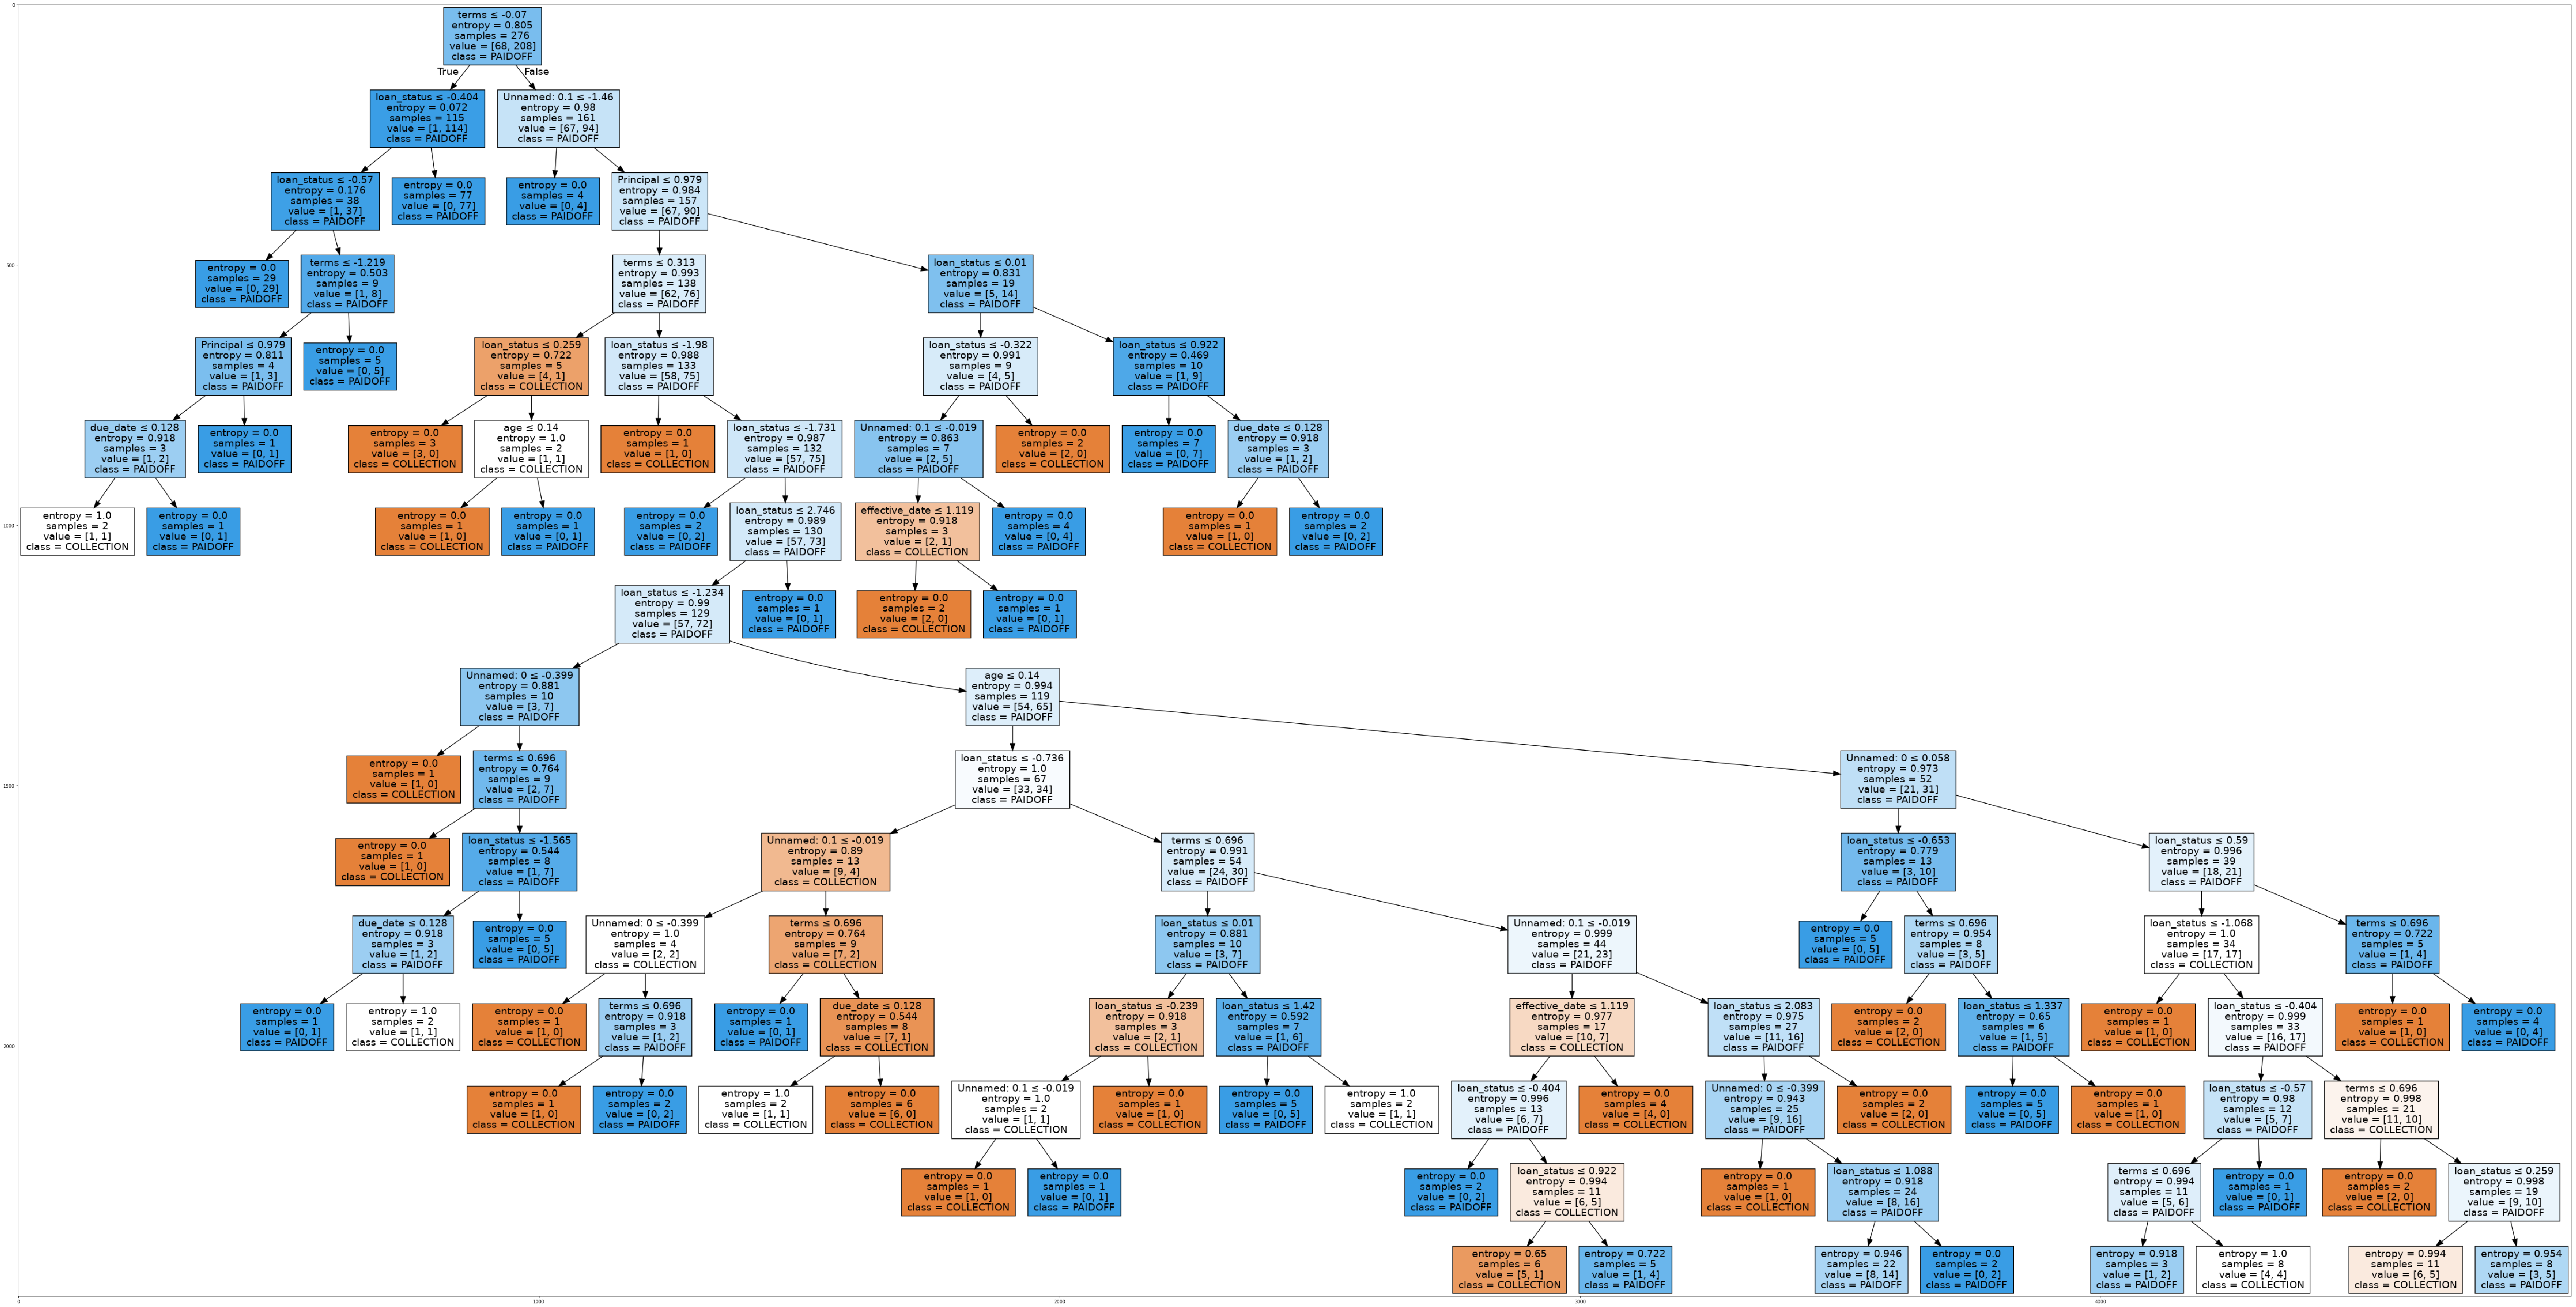

In [105]:
#Now we create our graphic
dot_data = StringIO()
filename = "loantree.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loantree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

As you can see above, this method isn't producing a good graph. Even after 15 possible divisions we still had some groups were not dividing well and were still roughly 50% paid off and 50% collection. If we were to use a decision tree, I would suggest the maximum 7th depth tree (shown below). Out of all the possibilities, there were two that didn't divide well. One group only had two individuals and the other had 139. This amounts to roughly 38% of the total number of loans. We could use this decision tree to speed along the decision process for almost 2/3 of the number of loans that would be processed and continue our current process for the last two blocks that we didn't get a good decision on. This should greatly increase the speed of our loan application process. If that is too much, do a tree of depth two, it doesn't speed up the process quite as much, but it does accomplish reducing the workload by about a 1/3. There was only 

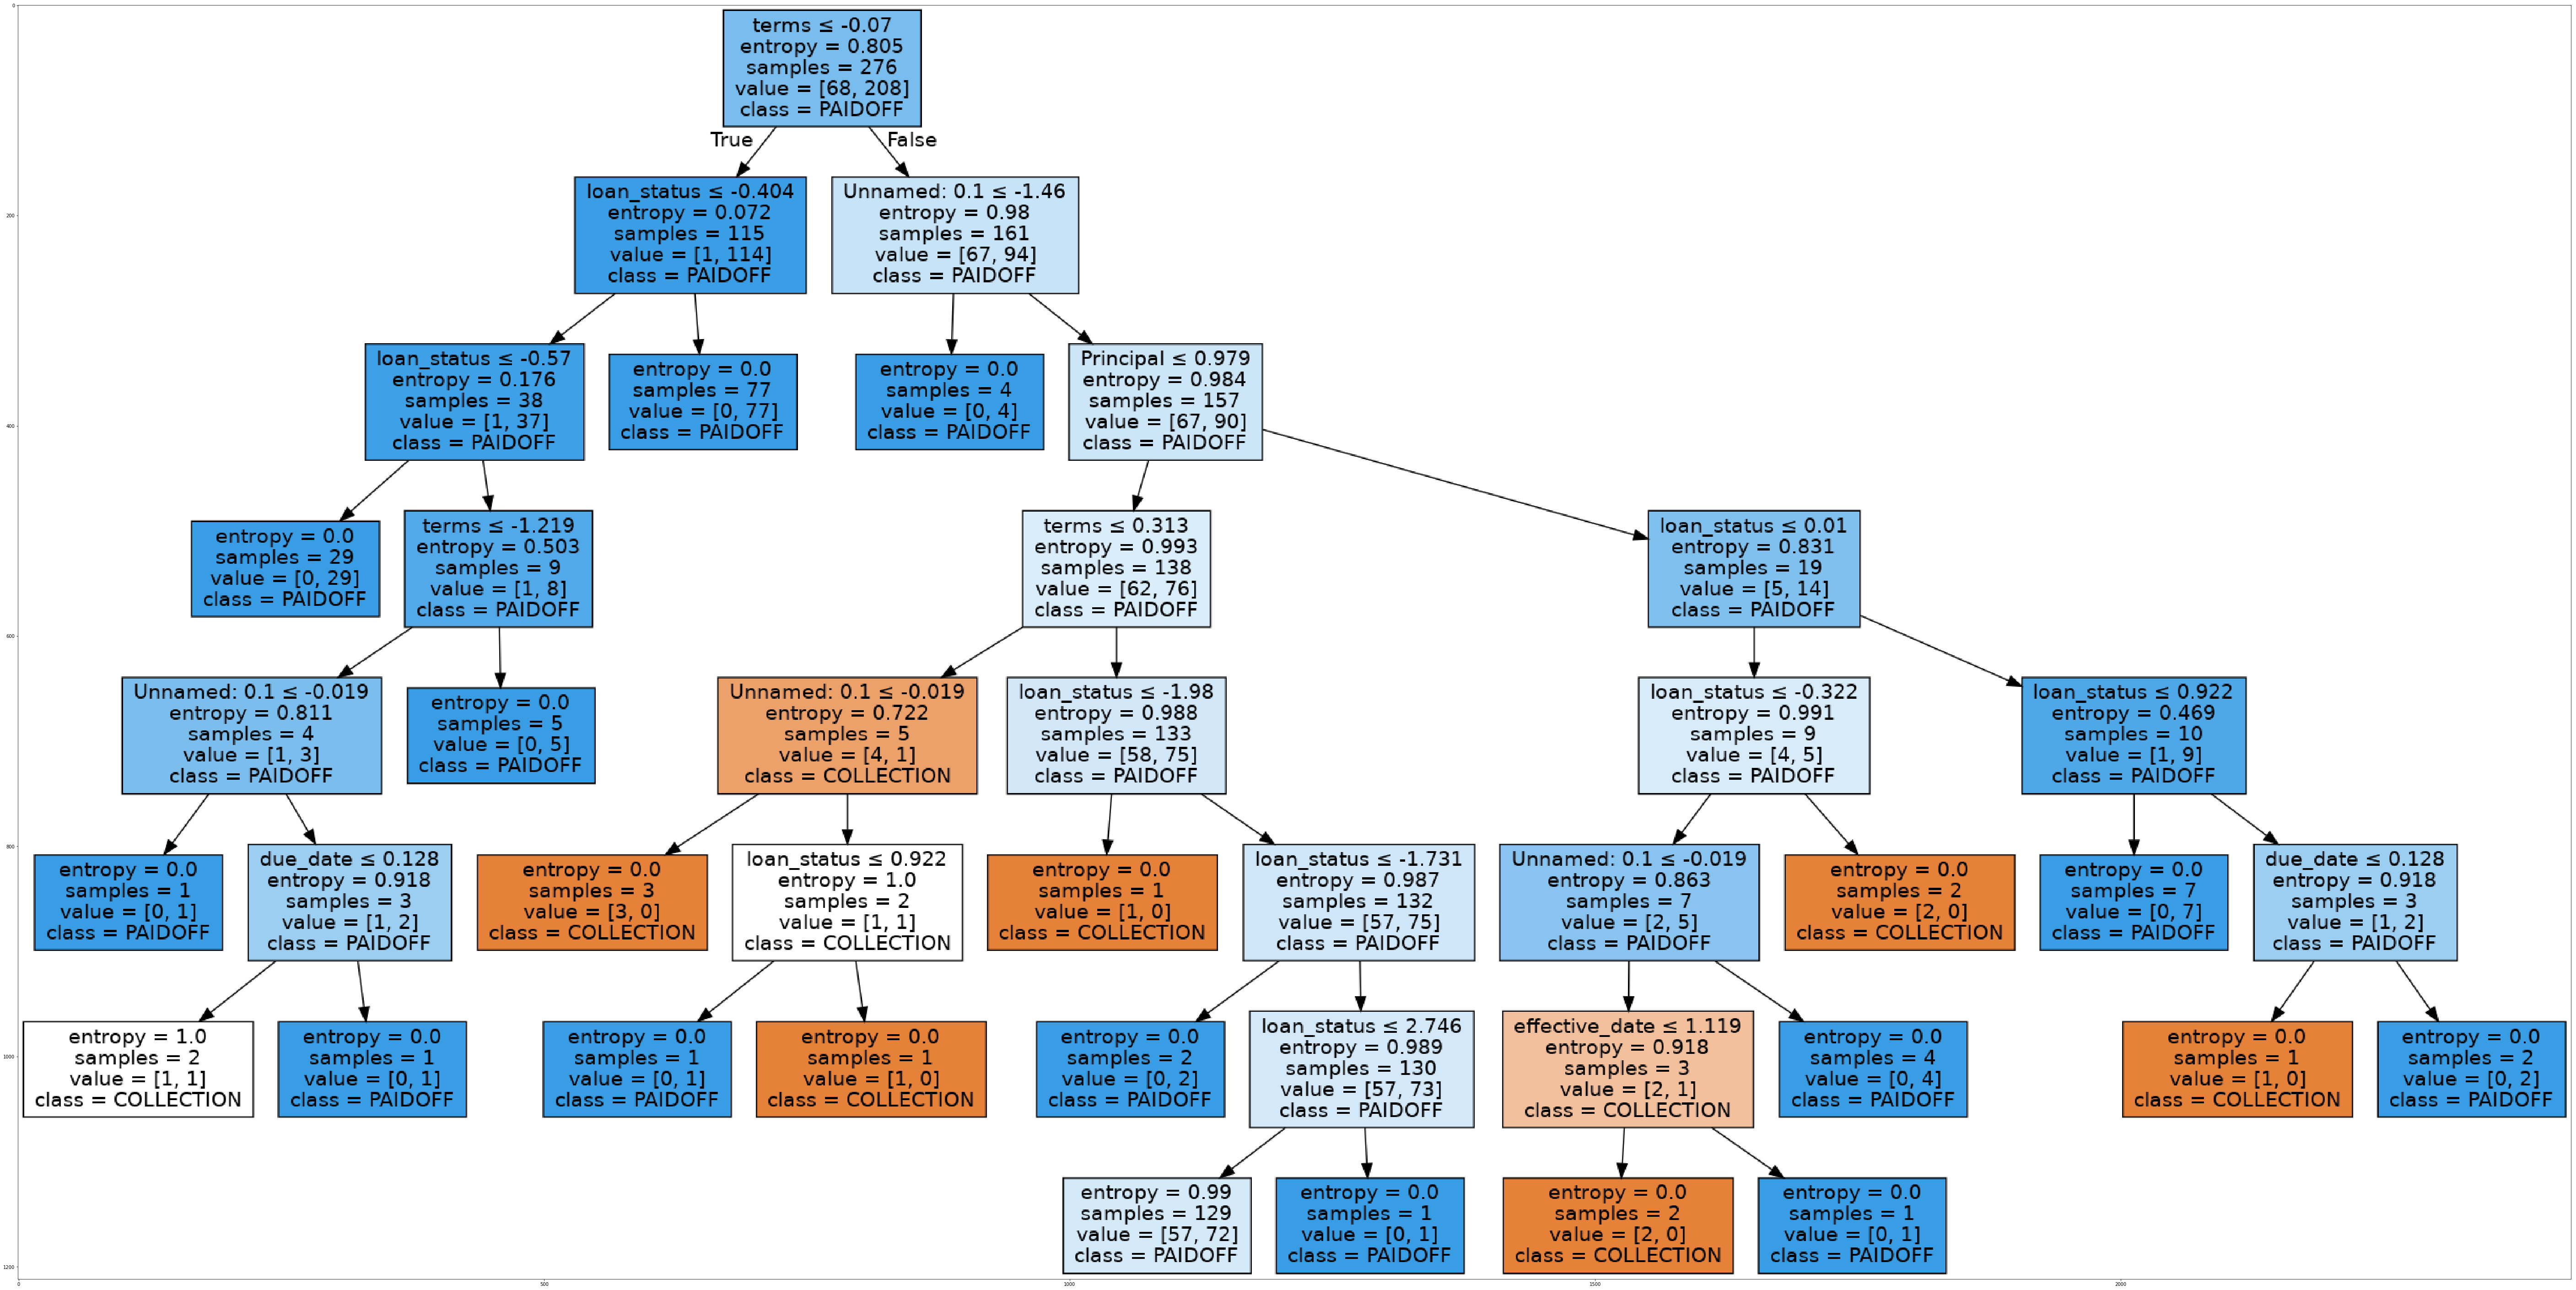

In [106]:
#Here we start the model
loantree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
#Fitting the data
loantree2.fit(X_train,y_train)

predTree2 = loantree2.predict(X_test)
#Now we create our graphic
dot_data = StringIO()
filename = "loantree2.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loantree2,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

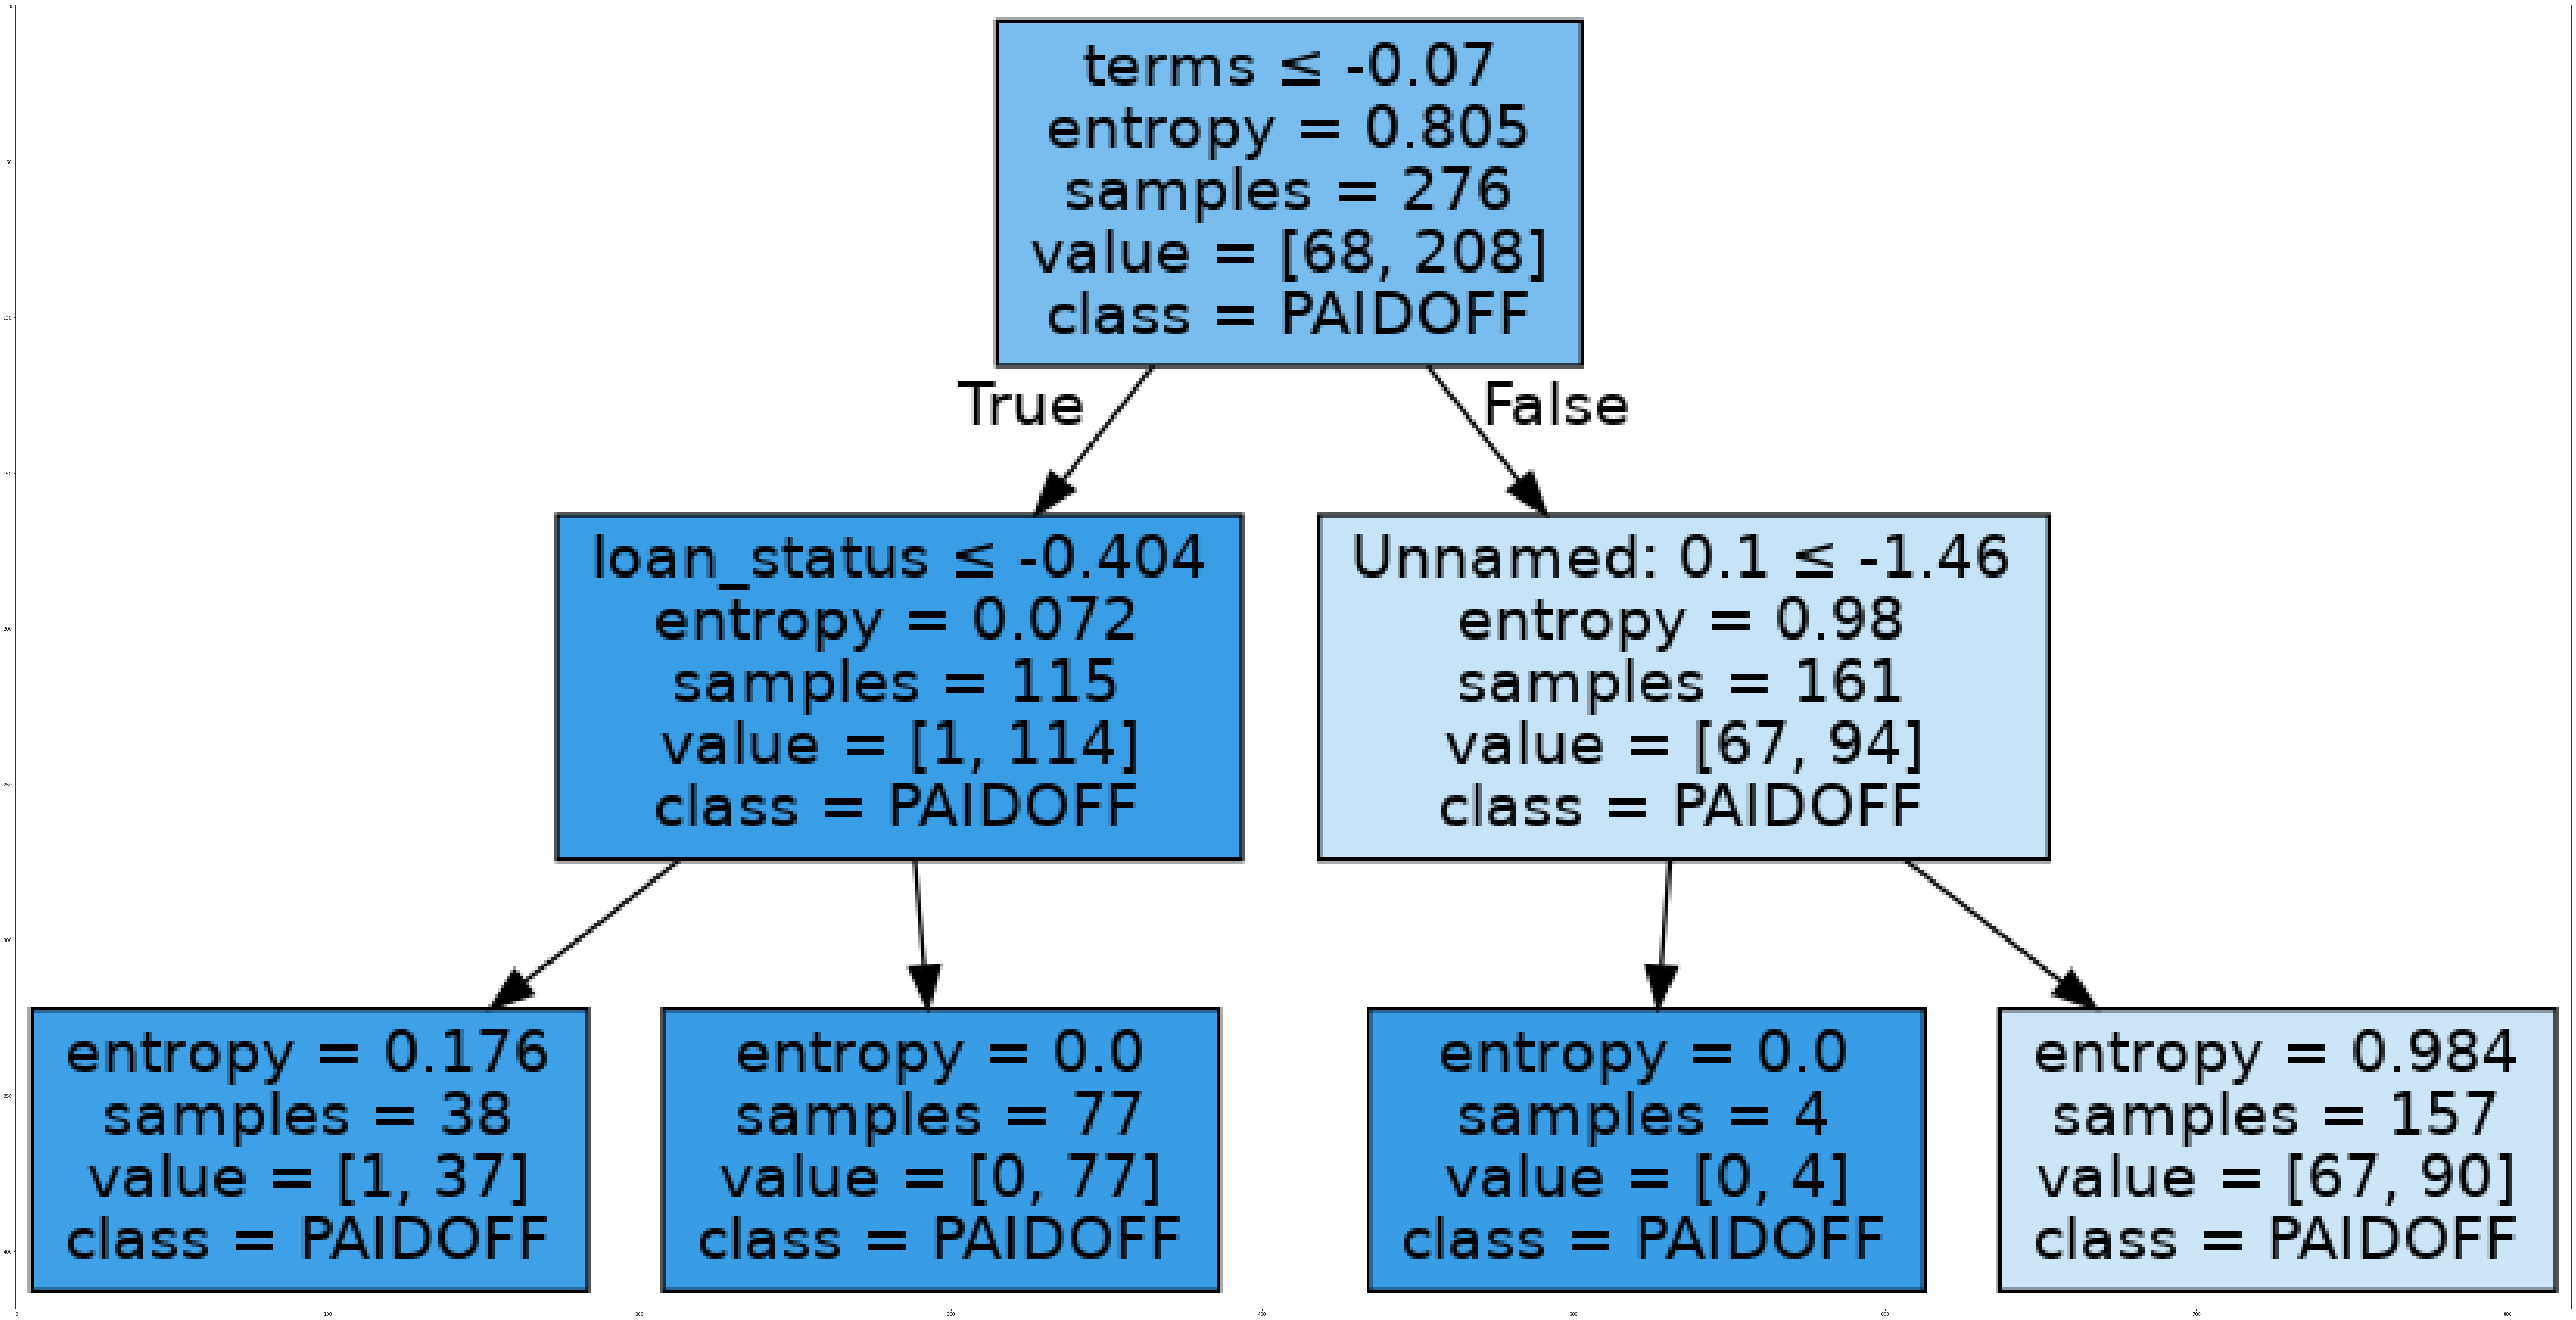

In [107]:
#Here we start the model
loantree3 = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
#Fitting the data
loantree3.fit(X_train,y_train)

predTree3 = loantree3.predict(X_test)
#Now we create our graphic
dot_data = StringIO()
filename = "loantree2.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loantree3,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [108]:
#First we import the necessary libraries
from sklearn import svm
y_train[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION'],
      dtype=object)

In [121]:
#Then we create the model and train it
clf2 = svm.SVC(kernel='poly')
clf2.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [129]:
#Predicting across our test set by our model
yhatsvm = clf2.predict(X_test)
yhatsvm [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [111]:
#To get the confusion matrix for this model first we import the right libraries
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [118]:
#Create our matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       0.50      0.06      0.10        18
     PAIDOFF       0.75      0.98      0.85        52

   micro avg       0.74      0.74      0.74        70
   macro avg       0.62      0.52      0.47        70
weighted avg       0.69      0.74      0.66        70

Confusion matrix, without normalization
[[51  1]
 [17  1]]


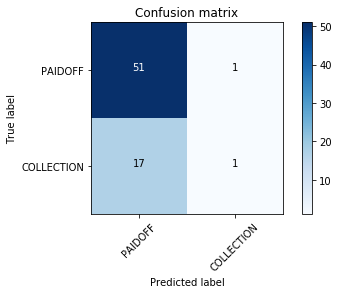

In [132]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatsvm, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

It seems the SVM methods can't separate these sets. I tried different kernels and the polynomial was the best at actually splitting the data. It still fails miserably though. I'm not sure where to go from here. 

# Logistic Regression

In [124]:
#First import the correct packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [125]:
#Then create the model and fit it
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
#Predict over test data
yhatlr = LR.predict(X_test)
yhatlr

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [127]:
#Get the probabilities
yhatlr_prob = LR.predict_proba(X_test)
yhatlr_prob

array([[0.49, 0.51],
       [0.28, 0.72],
       [0.5 , 0.5 ],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.47, 0.53],
       [0.31, 0.69],
       [0.39, 0.61],
       [0.33, 0.67],
       [0.36, 0.64],
       [0.31, 0.69],
       [0.43, 0.57],
       [0.49, 0.51],
       [0.3 , 0.7 ],
       [0.47, 0.53],
       [0.48, 0.52],
       [0.44, 0.56],
       [0.36, 0.64],
       [0.4 , 0.6 ],
       [0.48, 0.52],
       [0.36, 0.64],
       [0.33, 0.67],
       [0.42, 0.58],
       [0.43, 0.57],
       [0.5 , 0.5 ],
       [0.44, 0.56],
       [0.34, 0.66],
       [0.31, 0.69],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.43, 0.57],
       [0.42, 0.58],
       [0.35, 0.65],
       [0.27, 0.73],
       [0.46, 0.54],
       [0.33, 0.67],
       [0.29, 0.71],
       [0.47, 0.53],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.31, 0.69],
       [0.48, 0.52],
       [0.32, 0.68],
       [0.44, 0.56],
       [0.37, 0.63],
       [0.26, 0.74],
       [0.49,

Confusion matrix, without normalization
[[52  0]
 [17  1]]


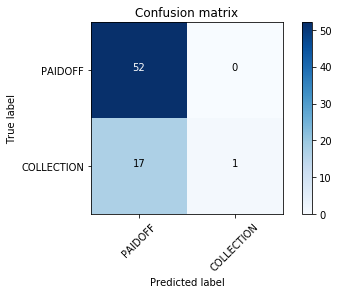

In [128]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatlr, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

Again, this didn't actually separate the data in the model. Something must be wrong.

# Model Evaluation using Test set

In [134]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [135]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-08-11 16:51:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-08-11 16:51:57 (352 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [142]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [143]:
#First we clean the data like before so it matches our model inputs
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.replace({'Bechalor':'Bachelor'},inplace=True)
test_df['dayofweek'] =test_df['effective_date'].dt.dayofweek
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#There are only two values with Master and Above. If we used this data, it will lead to overfitting.
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,dayofweek,Bachelor,High School or Below,college
0,1000.0,30.0,50.0,1.0,3.0,0,1,0
1,300.0,7.0,35.0,0.0,4.0,1,0,0
2,1000.0,30.0,43.0,1.0,5.0,0,0,1
3,1000.0,30.0,26.0,0.0,5.0,0,0,1
4,800.0,15.0,29.0,0.0,6.0,0,0,1


In [151]:
Feature.shape

(346, 8)

In [157]:
Feature=Feature.dropna()
Feature.shape

(54, 8)

In [158]:
#Now we normalize our test data
X = Feature
y = test_df['loan_status'].values
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


array([[ 0.49,  0.93,  3.06,  1.98, -0.29, -0.48,  1.41, -0.93],
       [-3.56, -1.7 ,  0.53, -0.51,  0.1 ,  2.1 , -0.71, -0.93],
       [ 0.49,  0.93,  1.88,  1.98,  0.49, -0.48, -0.71,  1.08],
       [ 0.49,  0.93, -0.98, -0.51,  0.49, -0.48, -0.71,  1.08],
       [-0.67, -0.79, -0.48, -0.51,  0.87, -0.48, -0.71,  1.08]])

In [159]:
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [161]:
#Now to predict using our k-nearest neighbors model and compare.
yhatknn = neigh.predict(X)
print("Test set Accuracy: ", metrics.accuracy_score(y, yhatknn))

Test set Accuracy:  0.7407407407407407


In [163]:
jaccard_similarity_score(y,yhatknn)

0.7407407407407407

In [169]:
f1_score(y,yhatknn,average='micro')

0.7407407407407407

For the decision trees:

In [172]:
#Predicting and then comparing
predTree3 = loantree3.predict(X)

In [173]:
jaccard_similarity_score(y,predTree3)

0.7407407407407407

In [174]:
f1_score(y,predTree3,average='micro')

0.7407407407407407

For SVM:

In [175]:
#Predicting and then comparing
yhatsvm = clf2.predict(X)

In [176]:
jaccard_similarity_score(y,yhatsvm)

0.7222222222222222

In [177]:
f1_score(y,yhatsvm,average='micro')

0.7222222222222222

For Logisitic Regression:

In [178]:
#Predicting and then comparing
yhatlr = LR.predict(X)

In [179]:
jaccard_similarity_score(y,yhatlr)

0.7407407407407407

In [180]:
f1_score(y,yhatlr,average='micro')

0.7407407407407407

In [183]:
#Don't forget logloss
from sklearn.metrics import log_loss
yhatlr_prob = LR.predict_proba(X)
log_loss(y, yhatlr_prob)

0.5843038253726414

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

My values:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | .740    | .740     | NA      |
| Decision Tree      | .740    | .740     | NA      |
| SVM                | .722    | .722     | NA      |
| LogisticRegression | .740    | .740     | .584    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>